# Lab2 - Concrete compressive strength regression
Author: *Arman Hosseinsarraf*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances. 

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`.

In [20]:
from sklearn.model_selection import cross_validate

def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms).
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
       
    #TODO: add function body here
    
    score = cross_validate(model, X, y, cv=cv, scoring='neg_root_mean_squared_error',  return_train_score=True)
    
    score_train = score["train_score"].mean()
    score_val = score["test_score"].mean()
    
    return np.around(score_train, decimals=2, out=None), np.around(score_val, decimals=2, out=None)
    

## 1. Load data
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Print the README of the concrete Dataset object. Load the Dataset object by using `return_dataset=True`.


In [3]:
#TODO: load the yellowbrick concrete Dataset object and access the README
from yellowbrick.datasets import load_concrete
concrete_dataset = load_concrete(data_home=None, return_dataset=True)
print(concrete_dataset.README)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

### *Question 1:* What is the target variable name and units in this dataset?

*Strength (compressive strength), and the units are megapascal known as MPa (float, ranging between 2.3-82.6)* 

### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`.

Print dimensions and type of `X`, `y`.

In [4]:
#TODO: Load feature matrix X and target vector y, print shapes
X, y = load_concrete(data_home=None, return_dataset=False)
print("Shape of X is: ", X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (1030, 8)
Shape of y is:  (1030,)


## 2. Inspect the data 

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features.

Print the minimum and maximum of each feature in `X`.

In [5]:
# TODO: print range (minimum and maximum) of features
print("per-feature minimum :\n {}".format(X.min(axis=0)))
print("----------------------------")
print("per-feature maximum :\n {}".format(X.max(axis=0)))

per-feature minimum :
 cement    102.00
slag        0.00
ash         0.00
water     121.75
splast      0.00
coarse    801.00
fine      594.00
age         1.00
dtype: float64
----------------------------
per-feature maximum :
 cement     540.0
slag       359.4
ash        200.1
water      247.0
splast      32.2
coarse    1145.0
fine       992.6
age        365.0
dtype: float64


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges.

Add y-axis label indicating units, and a title.

Text(0.5, 1.0, 'Concrete Materials')

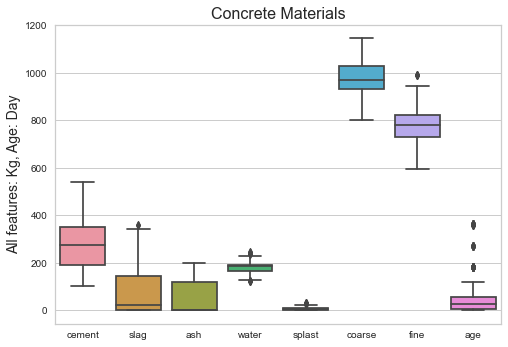

In [21]:
#TODO: add boxplot of features
ax = sns.boxplot(data=X)
ax.set_ylabel("All features: Kg, Age: Day", fontsize=14)
ax.axes.set_title("Concrete Materials", fontsize=16)

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

Text(0.5, 1.0, 'pair-wise cross-correlation between Concrete_Dataset features')

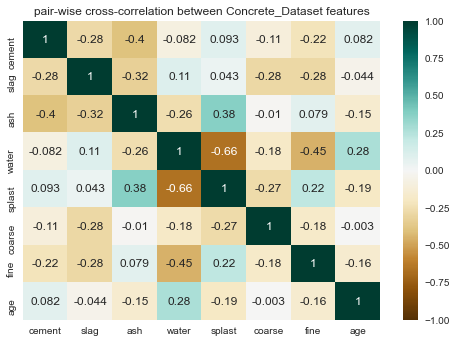

In [7]:
# TODO: add pairwise cross-correlation heatmap of features

sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title("pair-wise cross-correlation between Concrete_Dataset features")

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

Text(0.5, 1.0, "Target value's sample distribution")

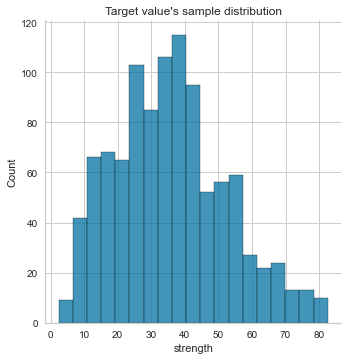

In [8]:
#TODO: Add histogram of targect vector
sns.displot(data=y)
plt.title("Target value's sample distribution")

## 3. Create training and test sets

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets.

In [9]:
# TODO: train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=37, test_size=0.2)
print("Shape of training samples: ", X_train.shape, y_train.shape)
print("Shape of test samples: ", X_test.shape, y_test.shape)

Shape of training samples:  (824, 8) (824,)
Shape of test samples:  (206, 8) (206,)


## 4. Compare models using cross-validation

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list, compute the negative root mean-squared error using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [22]:
#TODO: Calling get_regressor_neg_rms() for each model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linear_reg = LinearRegression()
random_reg = RandomForestRegressor(random_state=64)
grad_reg = GradientBoostingRegressor(random_state=79)

models = [linear_reg, random_reg, grad_reg]

for model in models:
    print(f"Model is:{model}\nTraining score, Validation score : {get_regressor_neg_rms(model, X_train, y_train, cv=7)}")

Model is:LinearRegression()
Training score, Validation score : (-10.29, -10.39)
Model is:RandomForestRegressor(random_state=64)
Training score, Validation score : (-2.12, -4.97)
Model is:GradientBoostingRegressor(random_state=79)
Training score, Validation score : (-3.69, -4.98)


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why.

*YOUR ANSWER HERE*  



## 5. Find a better model

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[50, 100, 150]`.

Use nested for-loops to iterate these two lists, compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [11]:
#TODO: Calling get_regressor_neg_rms() for each parameter pair
max_depth = [10, 15, 20]
n_estimators = [50, 100, 150]

for m_d in max_depth:
    for est in n_estimators:
        print(f"Max_depth: {m_d} | n_estimator: {est}\nTraining score, Validation score : {get_regressor_neg_rms(RandomForestRegressor(random_state=64, max_depth=m_d, n_estimators=est), X_train, y_train, cv=7)}")

Max_depth: 10 | n_estimator: 50
Training score, Validation score : (-2.48, -5.14)
Max_depth: 10 | n_estimator: 100
Training score, Validation score : (-2.44, -5.09)
Max_depth: 10 | n_estimator: 150
Training score, Validation score : (-2.42, -5.06)
Max_depth: 15 | n_estimator: 50
Training score, Validation score : (-2.17, -5.02)
Max_depth: 15 | n_estimator: 100
Training score, Validation score : (-2.12, -4.97)
Max_depth: 15 | n_estimator: 150
Training score, Validation score : (-2.1, -4.94)
Max_depth: 20 | n_estimator: 50
Training score, Validation score : (-2.16, -5.02)
Max_depth: 20 | n_estimator: 100
Training score, Validation score : (-2.12, -4.97)
Max_depth: 20 | n_estimator: 150
Training score, Validation score : (-2.1, -4.93)


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report this score here.

The results from section 5 show that the combination of max_depth=20 and n_estimators=150 outperformed other combinations and produced the best RandomForestRegressor model with a validation score of -4.93.

## 6. Retrain best model

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [12]:
#TODO: retrain the best estimator
best_model = RandomForestRegressor(random_state=64, max_depth=20, n_estimators=150).fit(X_train,y_train)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and R-squared

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [23]:
# TODO: print rms and r-squared for training and test set
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Root Mean squared error (RMSE)
print("Root Mean Squared Error for Training set: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("Root Mean Squared Error for Test set: {:.2f}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

# R-squared scores
print("R-squared for Training set: {:.3f}".format(r2_score(y_train, y_pred_train)))
print("R-squared for Testing set: {:.3f}".format(r2_score(y_test, y_pred_test)))

Root Mean Squared Error for Training set: 2.00
Root Mean Squared Error for Test set: 4.87

R-squared for Training set: 0.986
R-squared for Testing set: 0.913


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models?

Our RandomForestRegressor model outperformed Polynomial regression in both training and testing dataset for both RMS and R-squared metrics.
The performance of Neural network model reported in the paper is slightly better than our RandomForestRegressor in testing dataset for both RMS and R-squared metrics. However, our model outperformed the Neural network model in training dataset for both metrics. Since the performance of testing dataset is more important for model comparison, we can say that the Neural network outperformed our model.

Polynomial regression: training RMS=3.96 MPa (R2 = 0.890); testing RMS=8.82 MPa (R2 = 0.791)

Neural network: training RMS=3.01 MPa (R2 = 0.940); testing RMS=4.32 MPa (R2 = 0.929)

Regressor model: training RMS=2.00 MPa (R2 = 0.986); testing RMS=4.87 MPa (R2 = 0.913)

### 7.2 Predicted vs actual strength plot
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


Text(0.5, 1.0, 'Compressive Strength')

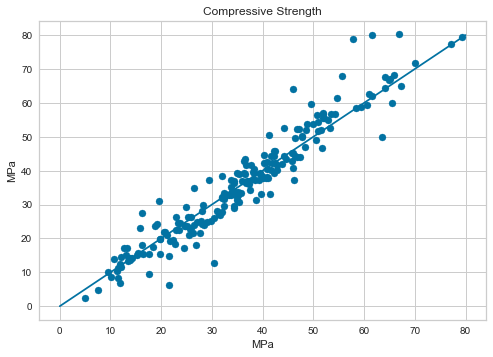

In [29]:
#TODO: predicted-actual plot
plt.scatter(y_pred_test, y_test)
x = np.linspace(0,80)
plt.plot(x,x)
plt.xlabel('MPa')
plt.ylabel('MPa')
plt.title('Compressive Strength')

### 7.3 Residual plot
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



Text(0.5, 1.0, 'actual and predicted strength')

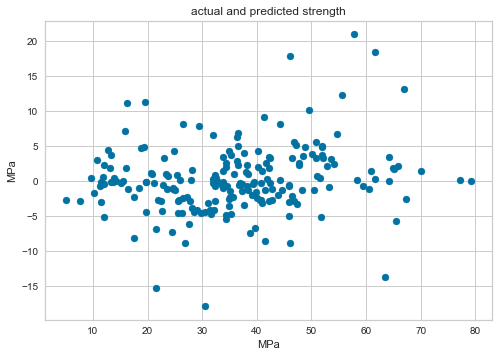

In [15]:
# TODO: Residual plot
plt.scatter(y_pred_test, y_test-y_pred_test)
plt.xlabel("MPa")
plt.ylabel("MPa")
plt.title("actual and predicted strength")

## 8. Conclusion

In conclusion, comment on the following items:
- Did we find a model that outperformes the polynomial regression reported in the reference article? Explain.

- Did we find a model that outperformes the neural network reported in the reference article? Explain.

- What was the assumption about the dataset and the reference article? How does this affect your conclusions?


- Yes, our RandomForestRegressor model with max_depth=20 and n_estimators=150 could achieve a higher performance for both training and test scores than Polynomial regression for both RMS and R-Squared evaluation metrics (results shown in Section 7 Question 4).

- No,  our RandomForestRegressor model did not outperform the Neural network because the performance metrics reported in the article for the test dataset was slightly better that our findings for both RMS and R-Squared. Although the performance of our model for training dataset was slighltly betther than Neural network's performance, we rely on the test dataset for model comparison (results shown in Section 7 Question 4).

- We assumed the yellowbrick dataset was used in the article and our model development and 20% of the dataset was used for testing purpose. There is no evidence that our approach to split the dataset is identical to the data split in the article. It means that we might used a different split of the dataset for training and testing which can affect the models comparison. In the future work, if we have access to the same split used in the article, we can replicate our result and conduct apples to apples model comparison.

## 9. Reflection



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

I enjoyed working on a real-world regression problem and applying RandomForestRegressor with cross validation to the dataset. This assignment allowed me to replicate a scientific article with a new modeling approach. 

The interesting of this assignment to me was to find a combination of model parameters to achieve the highest performance. I noticed that a unique combination of max_depth and n_estimators produced the best result. This assignment motivates me to explore more regression models and related evaluation metrics.

# Appendix: Optional - use grid search to find the best model parameters.

## Workflow overview

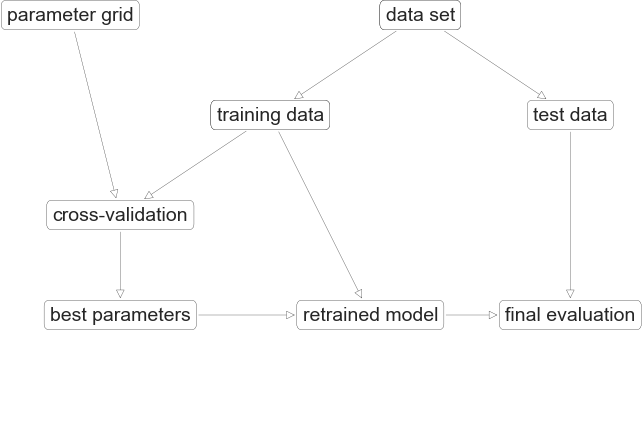

In [16]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [ 11, 13, 15, 17]`
- `'max_features': ['auto', 'log2', None]`


In [17]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)


In [18]:
# TODO: perform the grid search by calling fit()


In [19]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### A-5.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [ ]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*


## A-2. Retrain best model

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [ ]:
#TODO: retrain the best estimator



## A-3. Model evaluation and conclusion

Repeat steps in Section 7 above for the best model.

Revisit your conclusion.